<a href="https://colab.research.google.com/github/nikhardoshi/Covid19Detection/blob/main/ProjectCovid19BloodTest.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OrdinalEncoder
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler
from sklearn import metrics 
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import GridSearchCV
import tensorflow as tf
!pip install eli5 
import eli5
from eli5.sklearn import PermutationImportance

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 216 kB 5.2 MB/s 
     |████████████████████████████████| 133 kB 37.7 MB/s 
  Created wheel for eli5: filename=eli5-0.13.0-py2.py3-none-any.whl size=107748 sha256=a5d000ad09881621fe8c9bae03dc3a16f00c6a0e5680a49da27d8e153bb881c1
  Stored in directory: /root/.cache/pip/wheels/cc/3c/96/3ead31a8e6c20fc0f1a707fde2e05d49a80b1b4b30096573be
Successfully built eli5
  Attempting uninstall: jinja2
    Found existing installation: Jinja2 2.11.3
    Uninstalling Jinja2-2.11.3:
      Successfully uninstalled Jinja2-2.11.3
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
flask 1.1.4 requires Jinja2<3.0,>=2.10.1, but you have jinja2 3.1.2 which is incompatible.


In [ ]:
df=pd.read_excel('/content/drive/MyDrive/ML_Datasets/covid_study_v2.xlsx')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 279 entries, 0 to 278
Data columns (total 16 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   GENDER       279 non-null    object 
 1   AGE          279 non-null    int64  
 2   WBC          277 non-null    float64
 3   Platelets    277 non-null    float64
 4   Neutrophils  209 non-null    float64
 5   Lymphocytes  209 non-null    object 
 6   Monocytes    209 non-null    float64
 7   Eosinophils  209 non-null    float64
 8   Basophils    208 non-null    float64
 9   CRP          273 non-null    float64
 10  AST          277 non-null    float64
 11  ALT          266 non-null    float64
 12  ALP          131 non-null    float64
 13  GGT          136 non-null    float64
 14  LDH          194 non-null    float64
 15  SWAB         279 non-null    int64  
dtypes: float64(12), int64(2), object(2)
memory usage: 35.0+ KB


In [ ]:
df.head()

,GENDER,AGE,WBC,Platelets,Neutrophils,Lymphocytes,Monocytes,Eosinophils,Basophils,CRP,AST,ALT,ALP,GGT,LDH,SWAB
0,M,56,2.9,128.0,1.9,0.8,0.2,0.0,0.0,29.0,36.0,18.0,43.0,21.0,257.0,1
1,M,56,3.5,151.0,2.1,0.9,0.4,0.0,0.0,16.5,25.0,14.0,50.0,17.0,207.0,1
2,M,72,4.6,206.0,NaN,NaN,NaN,NaN,NaN,193.7,31.0,22.0,NaN,NaN,NaN,1
3,M,72,16.5,316.0,14.0,1.2,0.3,0.0,0.0,318.7,96.0,33.0,80.0,42.0,651.0,1
4,M,77,4.9,198.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1


In [ ]:
df['SWAB'].value_counts()

1    177
0    102
Name: SWAB, dtype: int64

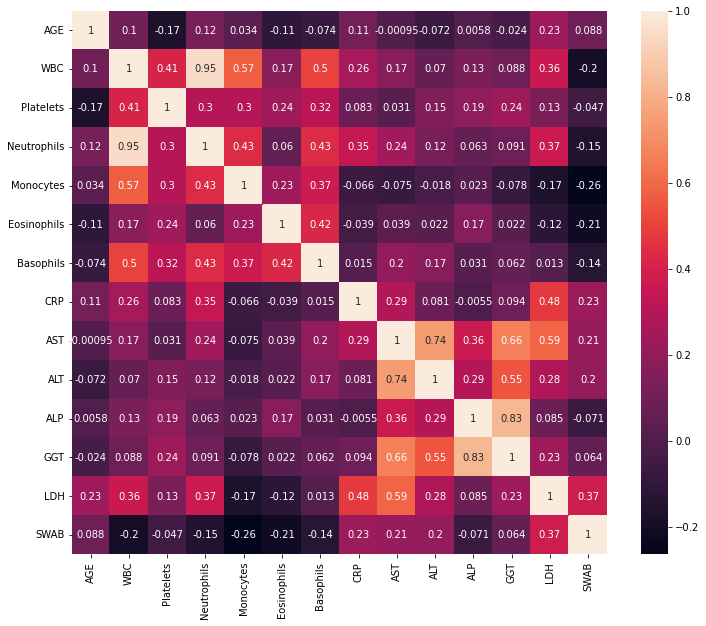

In [ ]:
plt.figure(figsize=(12,10))
sns.heatmap(df.corr(),annot=True)

From looking the above graph, we can see that no feature has direct correlation with our target variable swab.

*  The max we can see is LDH-Lactate Dehydrogenase; which tell us if the patient has tissue damage. These include anemia, liver disease, lung disease, and some types of infections. 

In Negative Correlations

*  Then there is Monocytes-a type of white blood cell (leukocytes) that reside in your blood and tissues to find and destroy germs. And rightly we can see that it has a negative correlation with the swab test.

*  Then comes Eosinophilis-which measures the number of one type of white blood cells called eosinophils. Eosinophils become active when you have certain allergic diseases, infections, and other medical conditions.

*  WBC is also prominent as same as Eosinophilis

In Positive Correlations:

*  CRP=C Reactive Protein-is a sign of acute inflammation. It may be due to serious infection, injury or chronic disease.

*  AST-Aspartate Aminotransferase-used to diagnose liver disorders. AST is a liver enzyme that's released in the blood when the liver is damaged.

*  ALT-Alanine Aminotransferase-same as AST 


**Although it is important to note that all these features are tested to see Linear Correlation with the Target Variable. There may be a correlation in other non-linear way.**

**Also we have not taken into count the Gender as of now. For that we will have to do feature encoding and before we do that we will have some data visualization and cleaning**

In [ ]:
numerical_cols = [cname for cname in df.columns if df[cname].dtype in ['int64', 'float64']]
numerical_cols

['AGE',
 'WBC',
 'Platelets',
 'Neutrophils',
 'Monocytes',
 'Eosinophils',
 'Basophils',
 'CRP',
 'AST',
 'ALT',
 'ALP',
 'GGT',
 'LDH',
 'SWAB']

<Figure size 864x720 with 0 Axes>

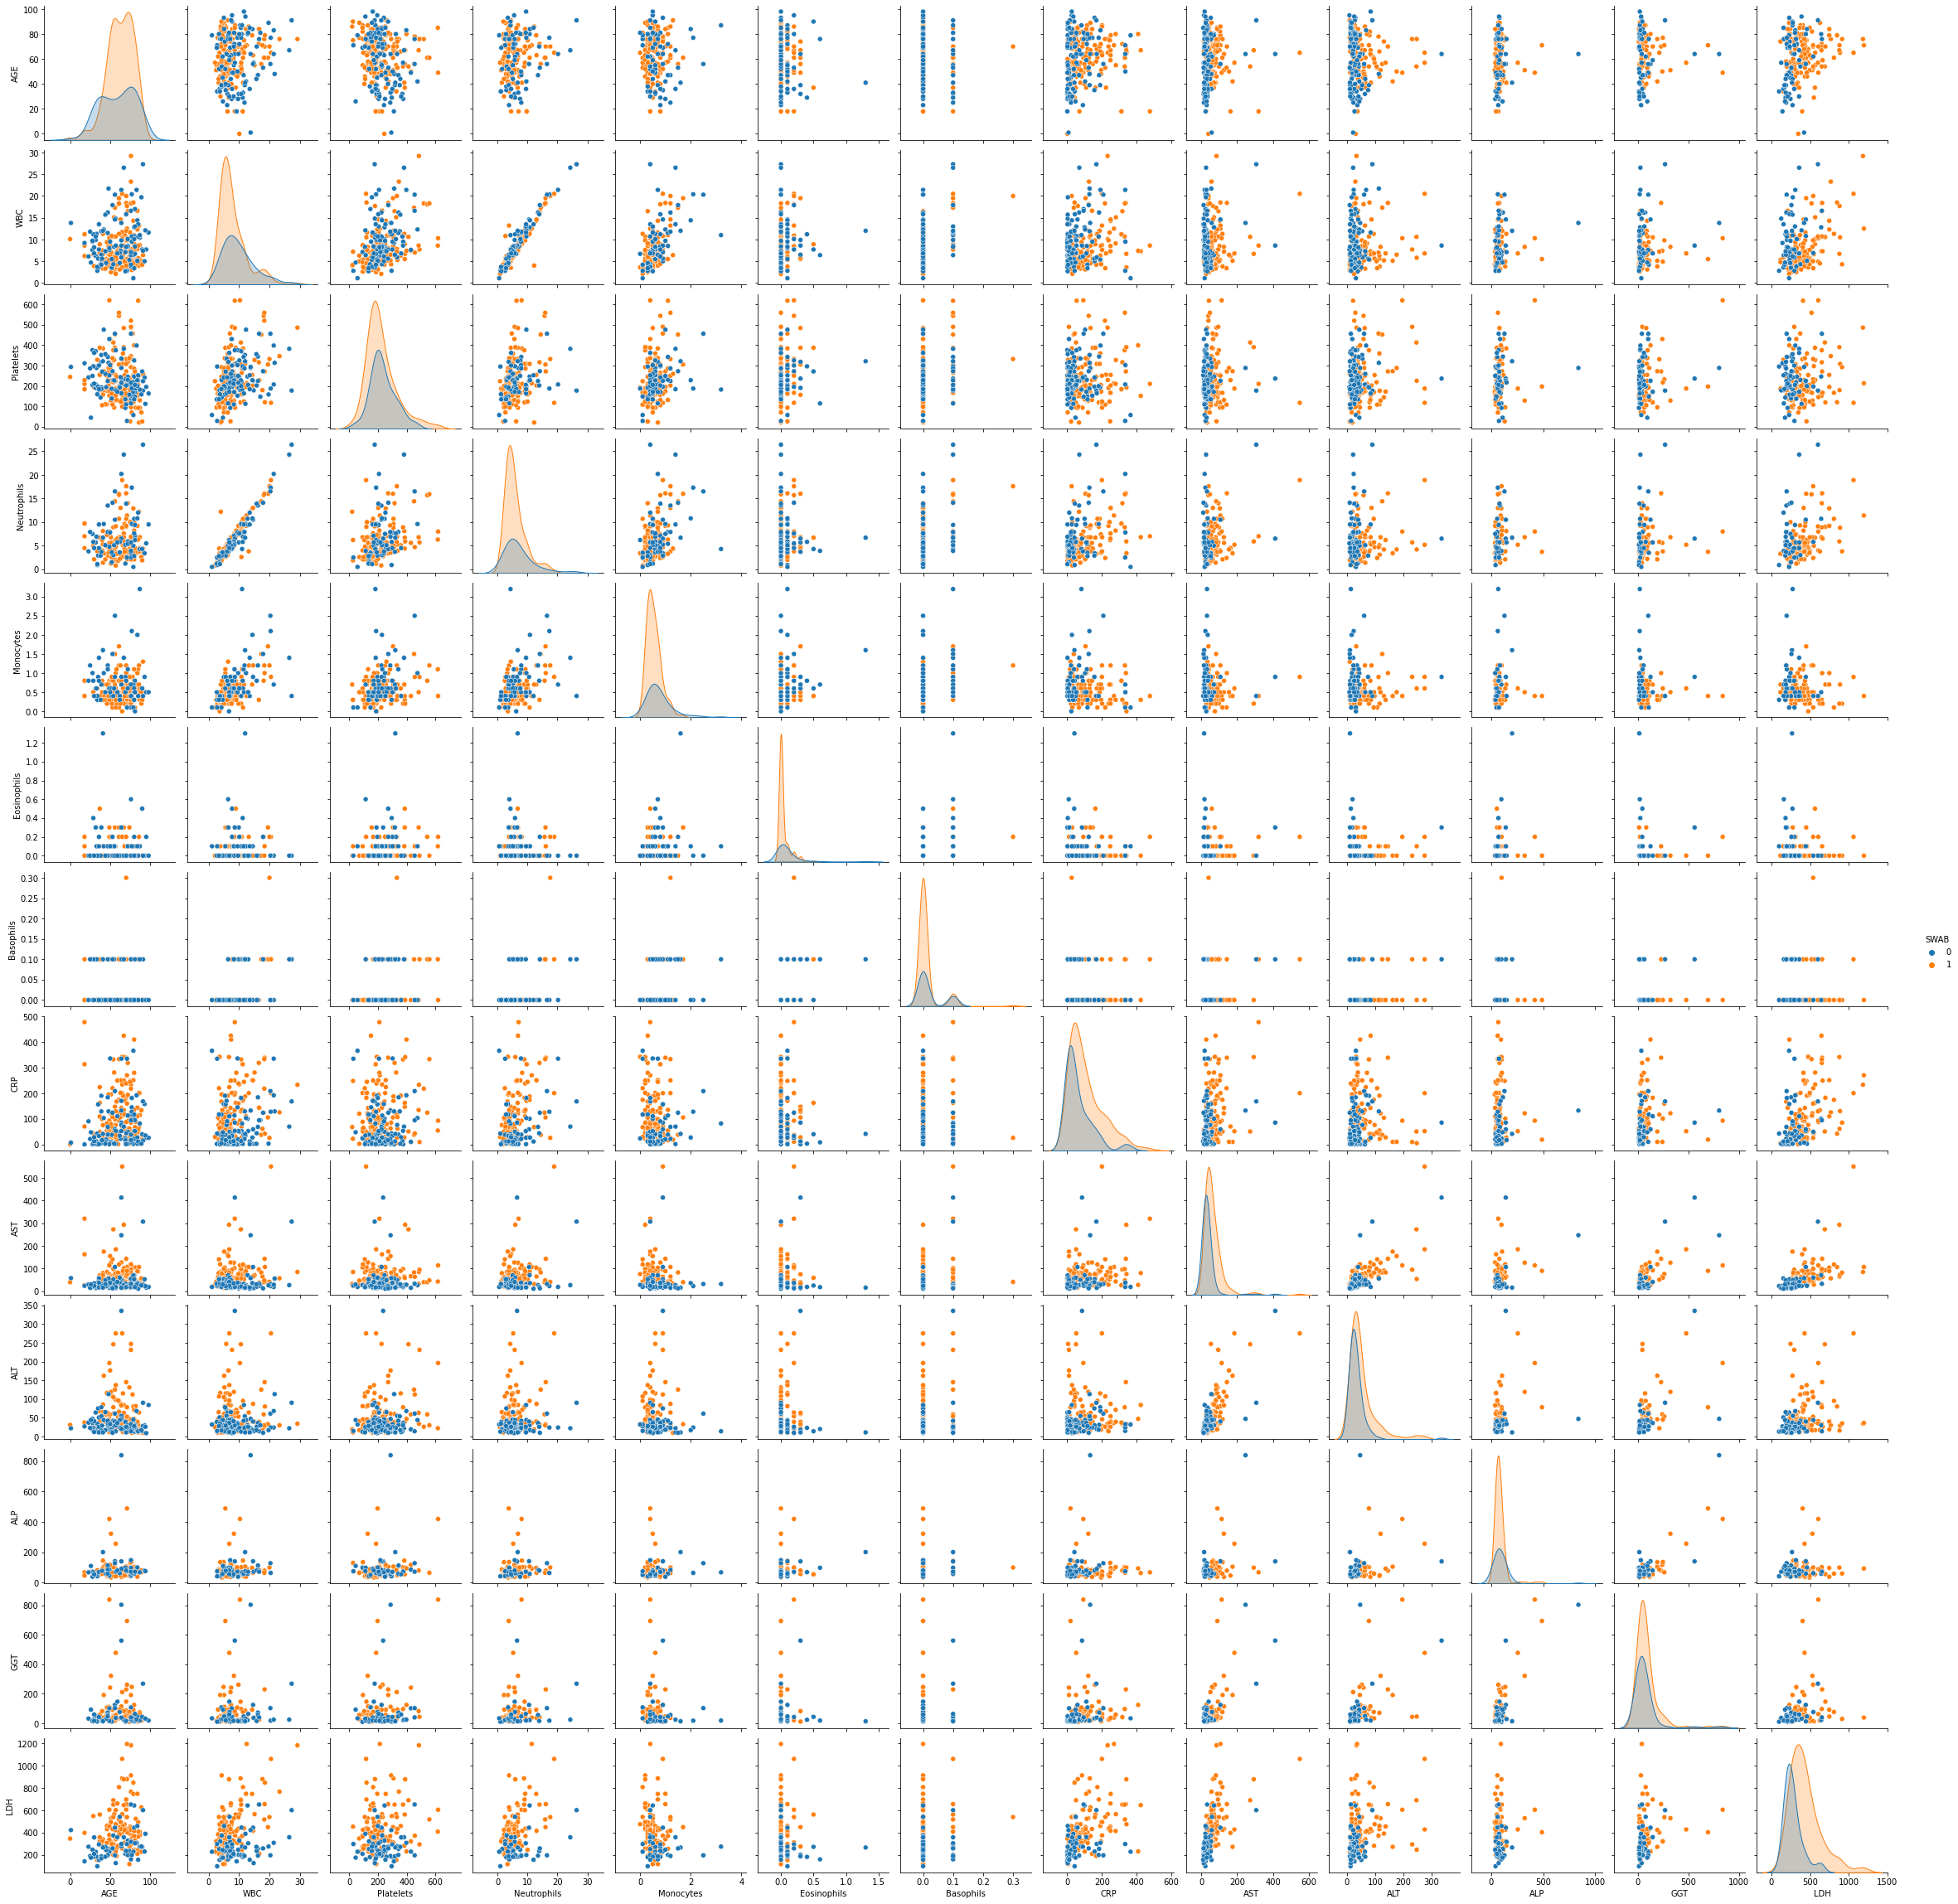

In [ ]:
plt.figure(figsize=(12,10))
sns.pairplot(df,hue='SWAB')

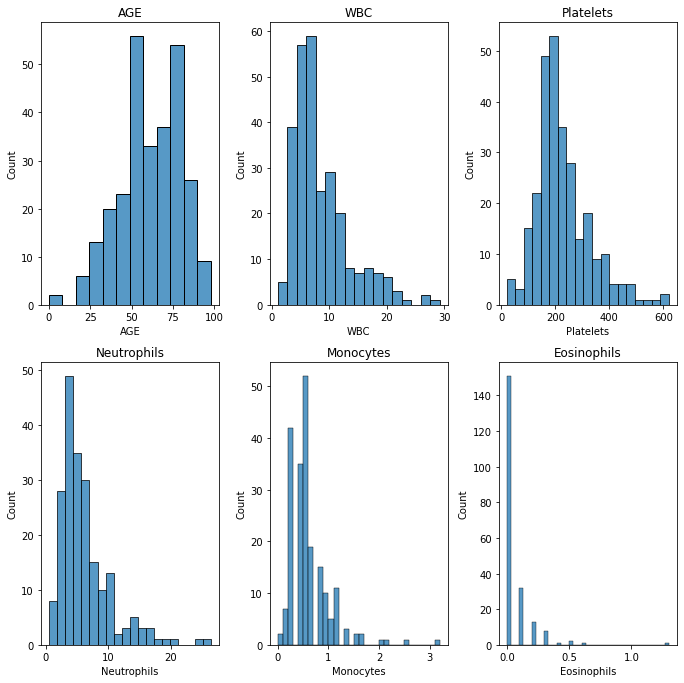

In [ ]:
n_cols=3
n_rows=2
# Subplots for all the features
fig,axs=plt.subplots(n_rows,n_cols,figsize=(n_cols*3.2,n_cols*3.2)) 
# Orignal value is 3.2 as per the video
for r in range(0,n_rows):
  for c in range(0,n_cols):
    # i is index
    i=r*n_cols+c
    ax=axs[r][c] #positions for all subplots
    sns.histplot(df[numerical_cols[i]],ax=ax)
    ax.set_title(numerical_cols[i])
    # ax.legend(title='Histogram', loc='upper right')
plt.tight_layout()

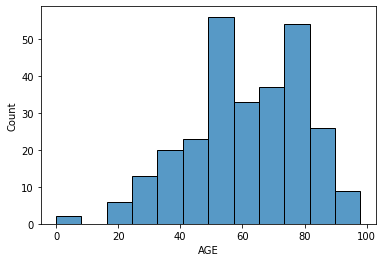

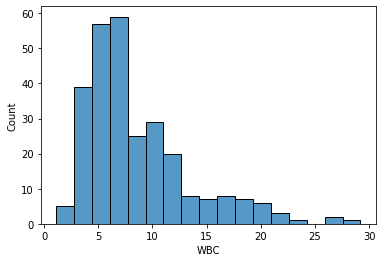

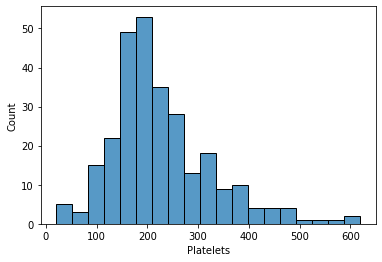

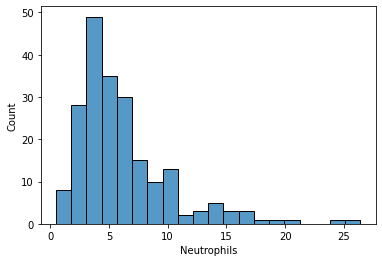

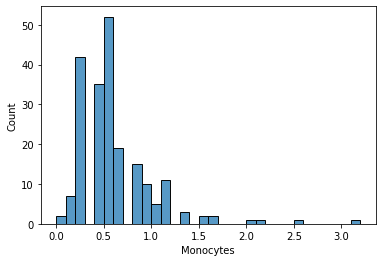

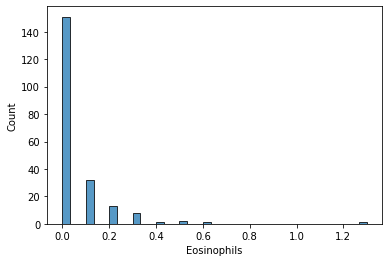

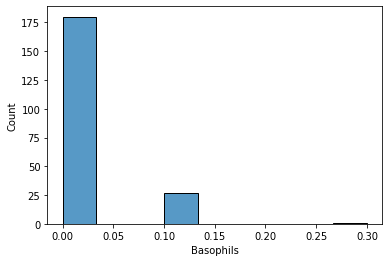

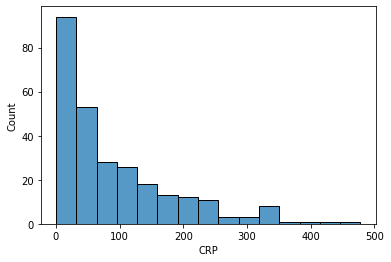

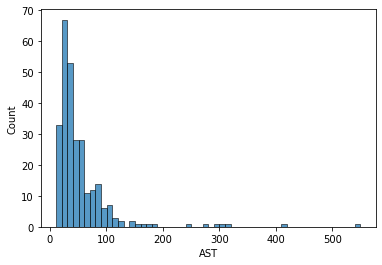

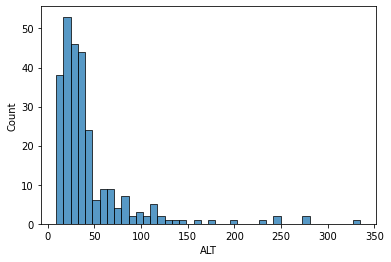

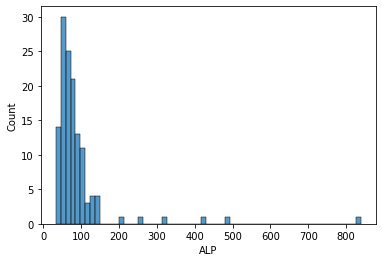

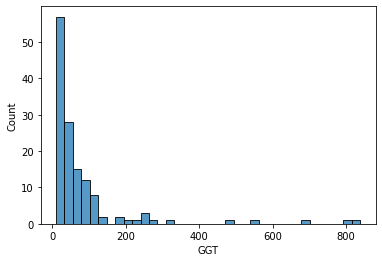

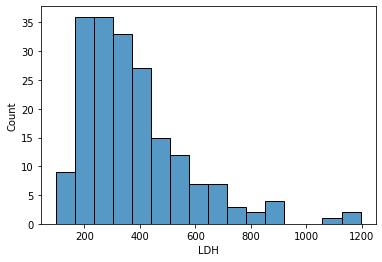

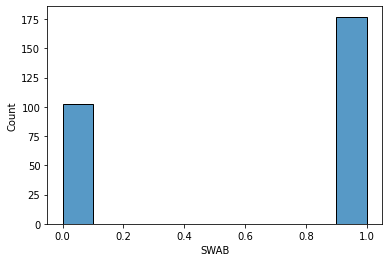

In [ ]:
for i in numerical_cols:
  sns.histplot(df[i])
  plt.show()

So from the graphs it is clealy visible that many features are right skewed. Not only that but there are outliers present in all of them. 

Now we cannot remove them because of two reasons:
*   Our dataset is already small right now
*   The outliers seem to be in really low numbers (below five).

So we will keep them for now and see what we get. We will then change accordingly.



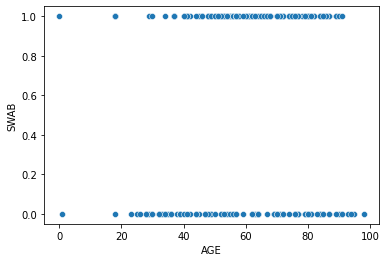

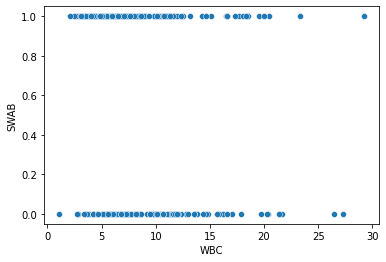

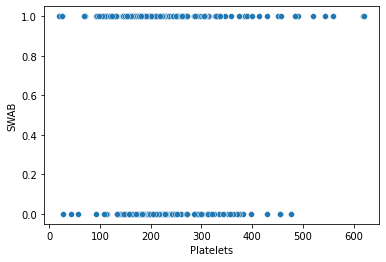

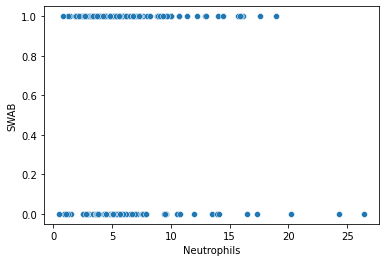

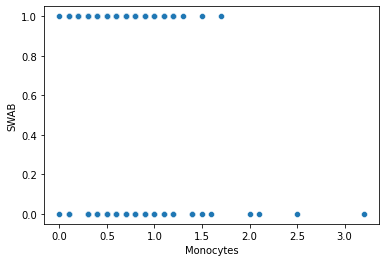

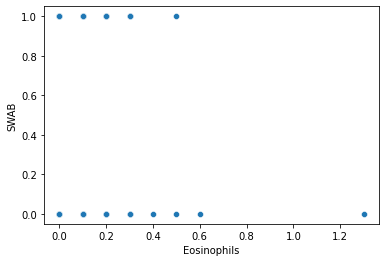

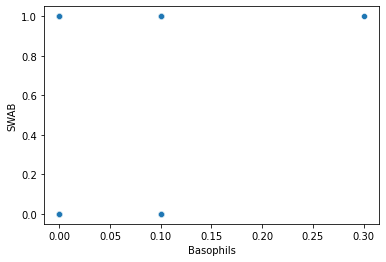

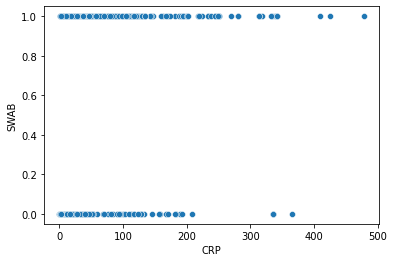

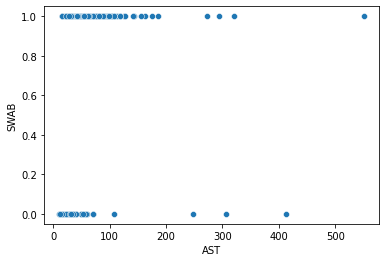

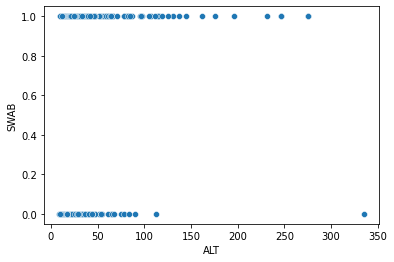

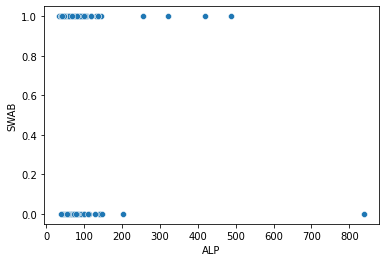

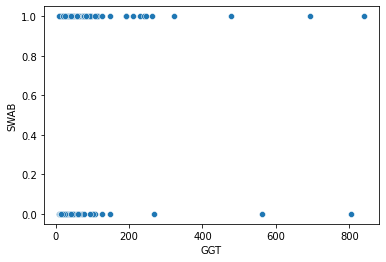

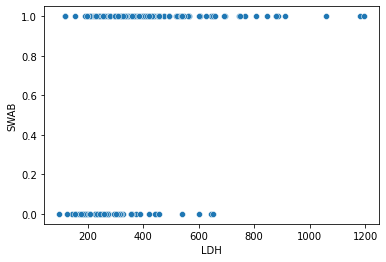

In [ ]:
for i in numerical_cols:
  if i!='SWAB':
    sns.scatterplot(x=i,y='SWAB',data=df)
    plt.show()

In [ ]:
df.isnull().sum()

GENDER           0
AGE              0
WBC              2
Platelets        2
Neutrophils     70
Lymphocytes     70
Monocytes       70
Eosinophils     70
Basophils       71
CRP              6
AST              2
ALT             13
ALP            148
GGT            143
LDH             85
SWAB             0
dtype: int64

There are a lot of missing values in the dataset. With ALP and GGT being highest with more than 50% of data missing. According to the correlation graph they have least relation with the target value, so we will drop them for now and see what happens.

#**Training with Removing the ALT and GGT values and also with Imbalanced dataset**

In [ ]:
df_1=df.drop(['GGT','ALP'],axis=1)

In [ ]:
df_1.describe()

,AGE,WBC,Platelets,Neutrophils,Monocytes,Eosinophils,Basophils,CRP,AST,ALT,LDH,SWAB
count,279.000000,277.000000,277.000000,209.000000,209.000000,209.000000,208.000000,273.000000,277.000000,266.000000,194.000000,279.000000
mean,61.336918,8.553069,226.532130,6.200478,0.605742,0.055024,0.014423,90.889011,54.202166,44.917293,380.448454,0.634409
std,18.491523,4.855353,101.174178,4.172581,0.410049,0.132237,0.039116,94.421406,57.612797,45.503232,193.983520,0.482461
min,0.000000,1.100000,20.000000,0.500000,0.000000,0.000000,0.000000,0.100000,11.000000,9.000000,98.000000,0.000000
25%,49.000000,5.100000,163.000000,3.500000,0.400000,0.000000,0.000000,21.400000,27.000000,21.000000,243.250000,0.000000
50%,64.000000,7.100000,205.000000,5.100000,0.500000,0.000000,0.000000,54.200000,36.000000,31.000000,328.000000,1.000000
75%,76.000000,10.700000,271.000000,7.500000,0.700000,0.100000,0.000000,129.100000,60.000000,46.000000,454.500000,1.000000
max,98.000000,29.200000,620.000000,26.400000,3.200000,1.300000,0.300000,478.000000,550.000000,335.000000,1195.000000,1.000000


See that features like Age, Eosinophilis,Monocytes and Basophilis have a minimum value of Zero. This is not possible. Age of any patient can never be zero.

ALthough for other features according to many websites the values can be zero and this may either represent that there is a problem in the body or it may be normal. There is no confirmation on which is which but the idea is the the value is possible, so we shall not touch that.

In [ ]:
mean=df_1['AGE'].mean() # The mean and median are almost same so we will replace the 0 values with mean
df_1['AGE'].replace(0,mean,inplace=True)

Now filling the missing values

In [ ]:
df_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 279 entries, 0 to 278
Data columns (total 14 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   GENDER       279 non-null    object 
 1   AGE          279 non-null    float64
 2   WBC          277 non-null    float64
 3   Platelets    277 non-null    float64
 4   Neutrophils  209 non-null    float64
 5   Lymphocytes  209 non-null    object 
 6   Monocytes    209 non-null    float64
 7   Eosinophils  209 non-null    float64
 8   Basophils    208 non-null    float64
 9   CRP          273 non-null    float64
 10  AST          277 non-null    float64
 11  ALT          266 non-null    float64
 12  LDH          194 non-null    float64
 13  SWAB         279 non-null    int64  
dtypes: float64(11), int64(1), object(2)
memory usage: 30.6+ KB


In [ ]:
df_1['AGE'].fillna(df_1['AGE'].median(), inplace=True)
df_1['Neutrophils'].fillna(df_1['Neutrophils'].median(), inplace=True)
# df_1['Lymphocytes'].fillna(df_1['Lymphocytes'].median(), inplace=True)
df_1['Monocytes'].fillna(df_1['Monocytes'].median(), inplace=True)
df_1['Eosinophils'].fillna(df_1['Eosinophils'].median(), inplace=True)
df_1['Basophils'].fillna(df_1['Basophils'].median(), inplace=True)
df_1['CRP'].fillna(df_1['CRP'].median(), inplace=True)
df_1['AST'].fillna(df_1['AST'].median(), inplace=True)
df_1['ALT'].fillna(df_1['ALT'].median(), inplace=True)
df_1['LDH'].fillna(df_1['LDH'].median(), inplace=True)
df_1['WBC'].fillna(df_1['WBC'].median(), inplace=True)
df_1['Platelets'].fillna(df_1['Platelets'].median(), inplace=True)

In [ ]:
df_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 279 entries, 0 to 278
Data columns (total 14 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   GENDER       279 non-null    object 
 1   AGE          279 non-null    float64
 2   WBC          279 non-null    float64
 3   Platelets    279 non-null    float64
 4   Neutrophils  279 non-null    float64
 5   Lymphocytes  209 non-null    object 
 6   Monocytes    279 non-null    float64
 7   Eosinophils  279 non-null    float64
 8   Basophils    279 non-null    float64
 9   CRP          279 non-null    float64
 10  AST          279 non-null    float64
 11  ALT          279 non-null    float64
 12  LDH          279 non-null    float64
 13  SWAB         279 non-null    int64  
dtypes: float64(11), int64(1), object(2)
memory usage: 30.6+ KB


For some reason Lymphocytes is in object which is strange, for some reason it missed my attention

In [ ]:
df_1['Lymphocytes'].value_counts()

1      22
0.6    16
0.5    16
0.9    16
0.7    15
1.2    13
1.1    13
1.3    12
0.8    10
0.4    10
1.4     8
1.5     6
1.6     6
2.3     6
0.3     5
1.7     4
0.2     3
2.7     3
2       3
1.8     3
2.1     2
2.4     2
1.9     2
2.2     2
3.3     2
3       1
2.5     1
3.1     1
2.9     1
4.1     1
3.6     1
7.2     1
0-4     1
2.6     1
Name: Lymphocytes, dtype: int64

In [ ]:
#There is an error, 0-4, it looks as if there is an incorrect data entry. As all others are in the form of Decimal Values, we will correct it accordingly
df_1['Lymphocytes'].replace('0-4','0.4',inplace=True)
df_1['Lymphocytes'].value_counts()
df['Lymphocytes'].replace('0-4','0.4',inplace=True)

In [ ]:
df_1['Lymphocytes'].fillna("",inplace=True)
df_1['Lymphocytes'].value_counts()
df['Lymphocytes'].fillna("",inplace=True)

In [ ]:
df_1.isnull().sum()

GENDER         0
AGE            0
WBC            0
Platelets      0
Neutrophils    0
Lymphocytes    0
Monocytes      0
Eosinophils    0
Basophils      0
CRP            0
AST            0
ALT            0
LDH            0
SWAB           0
dtype: int64

In [ ]:
# del Lym

In [ ]:
Lym=[]
for i in df_1['Lymphocytes']:
  if i!="":
    Lym.append(float(i))
  else:
    Lym.append(10000)
Lym

[0.8,
 0.9,
 10000,
 1.2,
 10000,
 0.4,
 1.3,
 0.6,
 0.8,
 0.6,
 10000,
 0.9,
 0.5,
 1.3,
 0.6,
 0.9,
 1.0,
 2.3,
 1.0,
 1.3,
 1.0,
 2.7,
 2.7,
 0.6,
 0.4,
 10000,
 10000,
 10000,
 0.8,
 1.2,
 0.8,
 10000,
 0.7,
 0.3,
 10000,
 0.6,
 1.2,
 0.4,
 0.5,
 10000,
 10000,
 0.6,
 10000,
 0.9,
 1.0,
 1.0,
 10000,
 10000,
 0.2,
 1.4,
 1.3,
 1.1,
 0.2,
 0.4,
 10000,
 10000,
 1.0,
 0.9,
 0.3,
 10000,
 0.5,
 0.7,
 0.9,
 0.8,
 0.3,
 0.4,
 0.7,
 10000,
 1.2,
 10000,
 10000,
 1.5,
 1.4,
 1.1,
 1.1,
 1.2,
 1.1,
 10000,
 1.6,
 1.0,
 1.0,
 0.5,
 1.0,
 0.5,
 0.3,
 1.3,
 1.7,
 10000,
 2.4,
 1.3,
 1.0,
 0.7,
 1.0,
 10000,
 0.7,
 0.9,
 1.3,
 1.4,
 1.3,
 1.2,
 1.2,
 1.1,
 0.8,
 0.8,
 1.1,
 0.9,
 1.9,
 10000,
 10000,
 0.5,
 0.8,
 0.9,
 10000,
 1.4,
 0.4,
 0.5,
 1.1,
 2.2,
 0.4,
 2.0,
 0.9,
 1.2,
 1.5,
 2.3,
 0.9,
 1.5,
 10000,
 0.7,
 1.1,
 1.0,
 0.4,
 1.2,
 1.4,
 10000,
 0.6,
 1.1,
 1.3,
 0.5,
 0.6,
 1.1,
 0.6,
 2.4,
 1.4,
 0.5,
 1.0,
 1.0,
 1.3,
 0.5,
 1.0,
 0.5,
 0.6,
 1.2,
 0.6,
 2.0,
 10000,
 0.6,
 0.8,
 1

In [ ]:
dummy=[]
for i in df['Lymphocytes']:
  if i!="":
    dummy.append(float(i))
  else:
    dummy.append(0)
df['Lymphocytes']=dummy
# dummy

In [ ]:
median=df['Lymphocytes'].median()
median

0.8

In [ ]:
df.describe()

,AGE,WBC,Platelets,Neutrophils,Lymphocytes,Monocytes,Eosinophils,Basophils,CRP,AST,ALT,ALP,GGT,LDH,SWAB
count,279.000000,277.000000,277.000000,209.000000,279.000000,209.000000,209.000000,208.000000,273.000000,277.000000,266.000000,131.000000,136.000000,194.000000,279.000000
mean,61.336918,8.553069,226.532130,6.200478,0.886022,0.605742,0.055024,0.014423,90.889011,54.202166,44.917293,89.893130,82.477941,380.448454,0.634409
std,18.491523,4.855353,101.174178,4.172581,0.866224,0.410049,0.132237,0.039116,94.421406,57.612797,45.503232,89.089864,132.702506,193.983520,0.482461
min,0.000000,1.100000,20.000000,0.500000,0.000000,0.000000,0.000000,0.000000,0.100000,11.000000,9.000000,34.000000,10.000000,98.000000,0.000000
25%,49.000000,5.100000,163.000000,3.500000,0.100000,0.400000,0.000000,0.000000,21.400000,27.000000,21.000000,57.500000,23.750000,243.250000,0.000000
50%,64.000000,7.100000,205.000000,5.100000,0.800000,0.500000,0.000000,0.000000,54.200000,36.000000,31.000000,71.000000,41.000000,328.000000,1.000000
75%,76.000000,10.700000,271.000000,7.500000,1.200000,0.700000,0.100000,0.000000,129.100000,60.000000,46.000000,90.000000,83.000000,454.500000,1.000000
max,98.000000,29.200000,620.000000,26.400000,7.200000,3.200000,1.300000,0.300000,478.000000,550.000000,335.000000,838.000000,839.000000,1195.000000,1.000000


In [ ]:
df_1['Lymphocytes']=Lym

SO what we did was we replaced the null values with "" which is blank value, then while encoding we replace that blank value with dummy value 10000. I chose it because that is the only impossible value, Lymphocytes could have zeroes too and we dont want to mix them with our missing values

In [ ]:
df_1.describe()

,AGE,WBC,Platelets,Neutrophils,Lymphocytes,Monocytes,Eosinophils,Basophils,CRP,AST,ALT,LDH,SWAB
count,279.000000,279.000000,279.000000,279.000000,279.000000,279.000000,279.000000,279.000000,279.000000,279.000000,279.000000,279.000000,279.000000
mean,61.556763,8.542652,226.377778,5.924373,2509.846595,0.579211,0.041219,0.010753,90.100000,54.071685,44.268817,364.469534,0.634409
std,18.120562,4.839415,100.826008,3.640734,4342.564710,0.357647,0.116853,0.034336,93.548974,57.425791,44.523651,163.428856,0.482461
min,1.000000,1.100000,20.000000,0.500000,0.200000,0.000000,0.000000,0.000000,0.100000,11.000000,9.000000,98.000000,0.000000
25%,49.000000,5.100000,163.500000,3.900000,0.800000,0.400000,0.000000,0.000000,21.800000,27.000000,22.000000,276.500000,0.000000
50%,64.000000,7.100000,205.000000,5.100000,1.200000,0.500000,0.000000,0.000000,54.200000,36.000000,31.000000,328.000000,1.000000
75%,76.000000,10.700000,271.000000,6.500000,5003.600000,0.700000,0.000000,0.000000,128.600000,60.000000,45.000000,404.500000,1.000000
max,98.000000,29.200000,620.000000,26.400000,10000.000000,3.200000,1.300000,0.300000,478.000000,550.000000,335.000000,1195.000000,1.000000


In [ ]:
df_1['Lymphocytes'].replace(10000,median,inplace=True)

In [ ]:
df_1.describe()

,AGE,WBC,Platelets,Neutrophils,Lymphocytes,Monocytes,Eosinophils,Basophils,CRP,AST,ALT,LDH,SWAB
count,279.000000,279.000000,279.000000,279.000000,279.000000,279.000000,279.000000,279.000000,279.000000,279.000000,279.000000,279.000000,279.000000
mean,61.556763,8.542652,226.377778,5.924373,1.086738,0.579211,0.041219,0.010753,90.100000,54.071685,44.268817,364.469534,0.634409
std,18.120562,4.839415,100.826008,3.640734,0.717011,0.357647,0.116853,0.034336,93.548974,57.425791,44.523651,163.428856,0.482461
min,1.000000,1.100000,20.000000,0.500000,0.200000,0.000000,0.000000,0.000000,0.100000,11.000000,9.000000,98.000000,0.000000
25%,49.000000,5.100000,163.500000,3.900000,0.800000,0.400000,0.000000,0.000000,21.800000,27.000000,22.000000,276.500000,0.000000
50%,64.000000,7.100000,205.000000,5.100000,0.800000,0.500000,0.000000,0.000000,54.200000,36.000000,31.000000,328.000000,1.000000
75%,76.000000,10.700000,271.000000,6.500000,1.200000,0.700000,0.000000,0.000000,128.600000,60.000000,45.000000,404.500000,1.000000
max,98.000000,29.200000,620.000000,26.400000,7.200000,3.200000,1.300000,0.300000,478.000000,550.000000,335.000000,1195.000000,1.000000


In [ ]:
df_1['GENDER'].replace({'M':0,'F':1},inplace=True)

In [ ]:
df_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 279 entries, 0 to 278
Data columns (total 14 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   GENDER       279 non-null    int64  
 1   AGE          279 non-null    float64
 2   WBC          279 non-null    float64
 3   Platelets    279 non-null    float64
 4   Neutrophils  279 non-null    float64
 5   Lymphocytes  279 non-null    float64
 6   Monocytes    279 non-null    float64
 7   Eosinophils  279 non-null    float64
 8   Basophils    279 non-null    float64
 9   CRP          279 non-null    float64
 10  AST          279 non-null    float64
 11  ALT          279 non-null    float64
 12  LDH          279 non-null    float64
 13  SWAB         279 non-null    int64  
dtypes: float64(12), int64(2)
memory usage: 30.6 KB


In [ ]:
X=df_1.copy()
y=X.pop('SWAB')

In [ ]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 279 entries, 0 to 278
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   GENDER       279 non-null    int64  
 1   AGE          279 non-null    float64
 2   WBC          279 non-null    float64
 3   Platelets    279 non-null    float64
 4   Neutrophils  279 non-null    float64
 5   Lymphocytes  279 non-null    float64
 6   Monocytes    279 non-null    float64
 7   Eosinophils  279 non-null    float64
 8   Basophils    279 non-null    float64
 9   CRP          279 non-null    float64
 10  AST          279 non-null    float64
 11  ALT          279 non-null    float64
 12  LDH          279 non-null    float64
dtypes: float64(12), int64(1)
memory usage: 28.5 KB


In [ ]:
num_cols=X.columns[1:]
num_cols

Index(['AGE', 'WBC', 'Platelets', 'Neutrophils', 'Lymphocytes', 'Monocytes',
       'Eosinophils', 'Basophils', 'CRP', 'AST', 'ALT', 'LDH'],
      dtype='object')

In [ ]:
stdsca=StandardScaler()
X[num_cols]=stdsca.fit_transform(X[num_cols])
X.describe()

,GENDER,AGE,WBC,Platelets,Neutrophils,Lymphocytes,Monocytes,Eosinophils,Basophils,CRP,AST,ALT,LDH
count,279.000000,2.790000e+02,2.790000e+02,2.790000e+02,2.790000e+02,2.790000e+02,2.790000e+02,2.790000e+02,2.790000e+02,2.790000e+02,2.790000e+02,2.790000e+02,2.790000e+02
mean,0.326165,3.820122e-17,-2.037399e-16,-1.623552e-16,-3.820122e-17,2.292073e-16,1.719055e-16,9.550306e-18,-2.546748e-17,-1.146037e-16,-1.273374e-17,1.018699e-16,-7.640244e-17
std,0.469651,1.001797e+00,1.001797e+00,1.001797e+00,1.001797e+00,1.001797e+00,1.001797e+00,1.001797e+00,1.001797e+00,1.001797e+00,1.001797e+00,1.001797e+00,1.001797e+00
min,0.000000,-3.347886e+00,-1.540688e+00,-2.050549e+00,-1.492589e+00,-1.238938e+00,-1.622415e+00,-3.533731e-01,-3.137279e-01,-9.637917e-01,-7.513886e-01,-7.935601e-01,-1.633422e+00
25%,0.000000,-6.942018e-01,-7.126561e-01,-6.247472e-01,-5.570334e-01,-4.006268e-01,-5.019848e-01,-3.533731e-01,-3.137279e-01,-7.314108e-01,-4.722674e-01,-5.010558e-01,-5.392414e-01
50%,0.000000,1.350746e-01,-2.986404e-01,-2.124074e-01,-2.268373e-01,-4.006268e-01,-2.218773e-01,-3.533731e-01,-3.137279e-01,-3.844458e-01,-3.152618e-01,-2.985528e-01,-2.235533e-01
75%,1.000000,7.984957e-01,4.465879e-01,4.433619e-01,1.583916e-01,1.582476e-01,3.383377e-01,-3.533731e-01,-3.137279e-01,4.122887e-01,1.034199e-01,1.645186e-02,2.453814e-01
max,1.000000,2.014768e+00,4.276233e+00,3.910990e+00,5.634144e+00,8.541363e+00,7.341025e+00,1.079171e+01,8.439281e+00,4.153942e+00,8.651504e+00,6.541548e+00,5.091040e+00


In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier

In [ ]:
model_list=[LogisticRegression(max_iter=1000),KNeighborsClassifier(),SVC(),DecisionTreeClassifier(random_state=0),RandomForestClassifier(random_state=0),XGBClassifier()]

In [ ]:
model_parameters={
    'lr':{
        'C':[1,5,10,20]
    },
    'knn':{
        'n_neighbors': [5,10,15,20]
    },
    'svc':{
        'kernel':['linear','rbf','poly','sigmoid'],
        'C':[1,5,10,20]
    },
    'tree':{
        'criterion':['gini', 'entropy', 'log_loss']
    },
    'forest':{
        'n_estimators':[10,20,50,100,250]
    },
    'xgb':{
        'eta': [0.2,0.3,0.5],
        'sampling_method':['uniform','subsample','gradient_based']
    }
}

In [ ]:
model_keys=list(model_parameters.keys())
model_keys

['lr', 'knn', 'svc', 'tree', 'forest', 'xgb']

In [ ]:
def modelselection(listm,hyperparameters):
  result=[]
  i=0
  for model in listm:
    key=model_keys[i]
    params=hyperparameters[key]
    i+=1
    print(model)
    print(params)
    classifier=GridSearchCV(model,params,cv=5)
    classifier.fit(X,y)
    result.append({
        'model_used': model,
        'highest_score':classifier.best_score_,
        'best_params':classifier.best_params_
    })
  result_df=pd.DataFrame(result,columns=['model_used','highest_score','best_params'])
  return result_df

In [ ]:
modelselection(model_list,model_parameters)

LogisticRegression(max_iter=1000)
{'C': [1, 5, 10, 20]}
KNeighborsClassifier()
{'n_neighbors': [5, 10, 15, 20]}
SVC()
{'kernel': ['linear', 'rbf', 'poly', 'sigmoid'], 'C': [1, 5, 10, 20]}
DecisionTreeClassifier(random_state=0)
{'criterion': ['gini', 'entropy', 'log_loss']}
RandomForestClassifier(random_state=0)
{'n_estimators': [10, 20, 50, 100, 250]}


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:372: FitFailedWarning: 
5 fits failed out of a total of 15.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
5 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.7/dist-packages/sklearn/tree/_classes.py", line 942, in fit
    X_idx_sorted=X_idx_sorted,
  File "/usr/local/lib/python3.7/dist-packages/sklearn/tree/_classes.py", line 352, in fit
    criterion = CRITERIA_CLF[self.criterion](
KeyError: 'log_loss'

  warnings.warn(some_fits_failed_messag

XGBClassifier()
{'eta': [0.2, 0.3, 0.5], 'sampling_method': ['uniform', 'subsample', 'gradient_based']}


,model_used,highest_score,best_params
0,LogisticRegression(max_iter=1000),0.713701,{'C': 1}
1,KNeighborsClassifier(),0.738701,{'n_neighbors': 10}
2,SVC(),0.753052,"{'C': 10, 'kernel': 'rbf'}"
3,DecisionTreeClassifier(random_state=0),0.695649,{'criterion': 'gini'}
4,RandomForestClassifier(random_state=0),0.784870,{'n_estimators': 100}
5,XGBClassifier(),0.756234,"{'eta': 0.2, 'sampling_method': 'uniform'}"


In [ ]:
rf=RandomForestClassifier(n_estimators=100,random_state=0)
X_train,X_test,y_train,y_test=train_test_split(X,y,stratify=y,test_size=0.25,random_state=0)
rf.fit(X_train,y_train)
preds=rf.predict(X_test)
from sklearn.metrics import confusion_matrix, classification_report

In [ ]:
preds

array([0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0,
       1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1,
       0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0,
       1, 1, 1, 1])

In [ ]:
print('Classification Report:\n',classification_report(y_test,preds))

Classification Report:
               precision    recall  f1-score   support

           0       0.78      0.69      0.73        26
           1       0.83      0.89      0.86        44

    accuracy                           0.81        70
   macro avg       0.81      0.79      0.80        70
weighted avg       0.81      0.81      0.81        70



Text(51.0, 0.5, 'True')

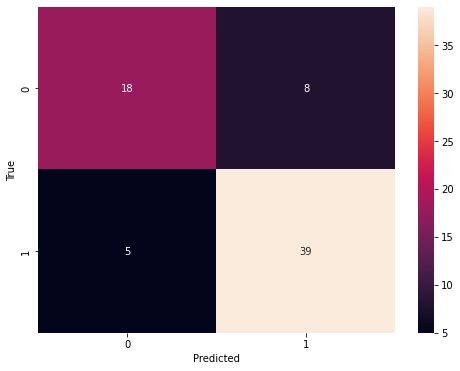

In [ ]:
cm1=tf.math.confusion_matrix(labels=y_test,predictions=preds)
plt.figure(figsize=(8,6))
sns.heatmap(cm1,annot=True,fmt='d')
plt.xlabel('Predicted')
plt.ylabel('True')

In [ ]:
perm = PermutationImportance(rf, random_state=1).fit(X_test, y_test)
eli5.show_weights(perm, feature_names = X_test.columns.tolist())

Weight,Feature
0.1057 ± 0.0560,AST
0.0229 ± 0.0530,WBC
0.0171 ± 0.0333,AGE
0.0114 ± 0.0379,CRP
0.0029 ± 0.0280,GENDER
0 ± 0.0000,Basophils
-0.0000 ± 0.0181,Lymphocytes
-0.0000 ± 0.0181,Platelets
-0.0057 ± 0.0291,LDH
-0.0057 ± 0.0140,ALT


#**Training with Removing the ALT and GGT values but with Balanced dataset**

In [ ]:
from imblearn.over_sampling import SMOTE
smote=SMOTE(sampling_strategy='minority')
X_sm,y_sm=smote.fit_resample(X,y)
y_sm.value_counts()
X_train1,X_test1,y_train1,y_test1=train_test_split(X_sm,y_sm,stratify=y_sm,test_size=0.2,random_state=2)

In [ ]:
dfsm=pd.concat([X_sm,y_sm],axis=1)

In [ ]:
def modelselectionsm(listm,hyperparameters):
  result=[]
  i=0
  for model in listm:
    key=model_keys[i]
    params=hyperparameters[key]
    i+=1
    print(model)
    print(params)
    classifier=GridSearchCV(model,params,cv=5)
    classifier.fit(X_sm,y_sm)
    result.append({
        'model_used': model,
        'highest_score':classifier.best_score_,
        'best_params':classifier.best_params_
    })
  result_df=pd.DataFrame(result,columns=['model_used','highest_score','best_params'])
  return result_df

In [ ]:
res=modelselectionsm(model_list,model_parameters)

LogisticRegression(max_iter=1000)
{'C': [1, 5, 10, 20]}
KNeighborsClassifier()
{'n_neighbors': [5, 10, 15, 20]}
SVC()
{'kernel': ['linear', 'rbf', 'poly', 'sigmoid'], 'C': [1, 5, 10, 20]}
DecisionTreeClassifier(random_state=0)
{'criterion': ['gini', 'entropy', 'log_loss']}
RandomForestClassifier(random_state=0)
{'n_estimators': [10, 20, 50, 100, 250]}


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:372: FitFailedWarning: 
5 fits failed out of a total of 15.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
5 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.7/dist-packages/sklearn/tree/_classes.py", line 942, in fit
    X_idx_sorted=X_idx_sorted,
  File "/usr/local/lib/python3.7/dist-packages/sklearn/tree/_classes.py", line 352, in fit
    criterion = CRITERIA_CLF[self.criterion](
KeyError: 'log_loss'

  warnings.warn(some_fits_failed_messag

XGBClassifier()
{'eta': [0.2, 0.3, 0.5], 'sampling_method': ['uniform', 'subsample', 'gradient_based']}


In [ ]:
res

,model_used,highest_score,best_params
0,LogisticRegression(max_iter=1000),0.697626,{'C': 1}
1,KNeighborsClassifier(),0.765553,{'n_neighbors': 10}
2,SVC(),0.816499,"{'C': 5, 'kernel': 'rbf'}"
3,DecisionTreeClassifier(random_state=0),0.762696,{'criterion': 'entropy'}
4,RandomForestClassifier(random_state=0),0.830503,{'n_estimators': 250}
5,XGBClassifier(),0.807928,"{'eta': 0.2, 'sampling_method': 'uniform'}"


In [ ]:
rf1=RandomForestClassifier(n_estimators=100,random_state=0)

In [ ]:
rf1.fit(X_train1,y_train1)
preds1=rf1.predict(X_test1)
print('Classification Report:\n',classification_report(y_test1,preds1))

Classification Report:
               precision    recall  f1-score   support

           0       0.94      0.83      0.88        36
           1       0.85      0.94      0.89        35

    accuracy                           0.89        71
   macro avg       0.89      0.89      0.89        71
weighted avg       0.89      0.89      0.89        71



Text(51.0, 0.5, 'True')

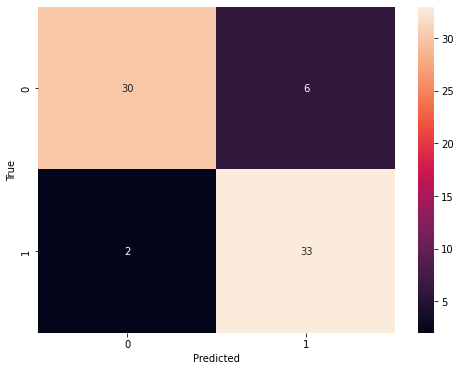

In [ ]:
cm=tf.math.confusion_matrix(labels=y_test1,predictions=preds1)
plt.figure(figsize=(8,6))
sns.heatmap(cm,annot=True,fmt='d')
plt.xlabel('Predicted')
plt.ylabel('True')

In [ ]:
perm = PermutationImportance(rf1, random_state=1).fit(X_test1, y_test1)
eli5.show_weights(perm, feature_names = X_test1.columns.tolist())

Weight,Feature
0.1803 ± 0.0764,AST
0.0704 ± 0.0398,WBC
0.0592 ± 0.0414,LDH
0.0535 ± 0.0374,CRP
0.0394 ± 0.0516,ALT
0.0338 ± 0.0422,Monocytes
0.0282 ± 0.0252,Neutrophils
0.0282 ± 0.0309,Platelets
0.0197 ± 0.0287,Lymphocytes
0.0169 ± 0.0211,AGE


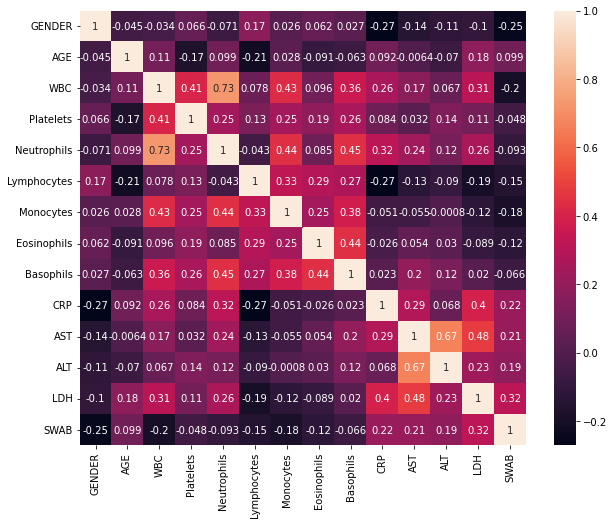

In [ ]:
plt.figure(figsize=(10,8))
sns.heatmap(df_1.corr(),annot=True)

#**Training without Removing the ALT and GGT values and also with Imbalanced dataset**

In [ ]:
df2=df.copy()

In [ ]:
df2.isnull().sum()

GENDER           0
AGE              0
WBC              2
Platelets        2
Neutrophils     70
Lymphocytes      0
Monocytes       70
Eosinophils     70
Basophils       71
CRP              6
AST              2
ALT             13
ALP            148
GGT            143
LDH             85
SWAB             0
dtype: int64

In [ ]:
mean=df2['AGE'].mean() # The mean and median are almost same so we will replace the 0 values with mean
df2['AGE'].replace(0,mean,inplace=True)
df2['AGE'].fillna(df2['AGE'].median(), inplace=True)
df2['Neutrophils'].fillna(df2['Neutrophils'].median(), inplace=True)
# df2['Lymphocytes'].fillna(df2['Lymphocytes'].median(), inplace=True)
df2['Monocytes'].fillna(df2['Monocytes'].median(), inplace=True)
df2['Eosinophils'].fillna(df2['Eosinophils'].median(), inplace=True)
df2['Basophils'].fillna(df2['Basophils'].median(), inplace=True)
df2['CRP'].fillna(df2['CRP'].median(), inplace=True)
df2['AST'].fillna(df2['AST'].median(), inplace=True)
df2['ALT'].fillna(df2['ALT'].median(), inplace=True)
df2['LDH'].fillna(df2['LDH'].median(), inplace=True)
df2['WBC'].fillna(df2['WBC'].median(), inplace=True)
df2['Platelets'].fillna(df2['Platelets'].median(), inplace=True)
df2['ALP'].fillna(df2['ALP'].median(), inplace=True)
df2['GGT'].fillna(df2['GGT'].median(), inplace=True)


df2['Lymphocytes'].replace('0-4','0.4',inplace=True)
df2['Lymphocytes'].fillna("",inplace=True)
Lym=[]
for i in df2['Lymphocytes']:
  if i!="":
    Lym.append(float(i))
  else:
    Lym.append(10000)
Lym
df2['Lymphocytes']=Lym
df2['Lymphocytes'].replace(10000,median,inplace=True)
df2['GENDER'].replace({'M':0,'F':1},inplace=True)

In [ ]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 279 entries, 0 to 278
Data columns (total 16 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   GENDER       279 non-null    int64  
 1   AGE          279 non-null    float64
 2   WBC          279 non-null    float64
 3   Platelets    279 non-null    float64
 4   Neutrophils  279 non-null    float64
 5   Lymphocytes  279 non-null    float64
 6   Monocytes    279 non-null    float64
 7   Eosinophils  279 non-null    float64
 8   Basophils    279 non-null    float64
 9   CRP          279 non-null    float64
 10  AST          279 non-null    float64
 11  ALT          279 non-null    float64
 12  ALP          279 non-null    float64
 13  GGT          279 non-null    float64
 14  LDH          279 non-null    float64
 15  SWAB         279 non-null    int64  
dtypes: float64(14), int64(2)
memory usage: 35.0 KB


In [ ]:
X2=df2.copy()
y2=X2.pop('SWAB')

In [ ]:
X2[num_cols]=stdsca.fit_transform(X2[num_cols])
X2.describe()
rf2=RandomForestClassifier(n_estimators=250,random_state=0)
X2_train,X2_test,y2_train,y2_test=train_test_split(X2,y2,stratify=y2,test_size=0.25,random_state=0)
rf2.fit(X2_train,y2_train)
preds2=rf2.predict(X2_test)
print('Classification Report:\n',classification_report(y2_test,preds2))


Classification Report:
               precision    recall  f1-score   support

           0       0.89      0.62      0.73        26
           1       0.81      0.95      0.88        44

    accuracy                           0.83        70
   macro avg       0.85      0.78      0.80        70
weighted avg       0.84      0.83      0.82        70



Text(51.0, 0.5, 'True')

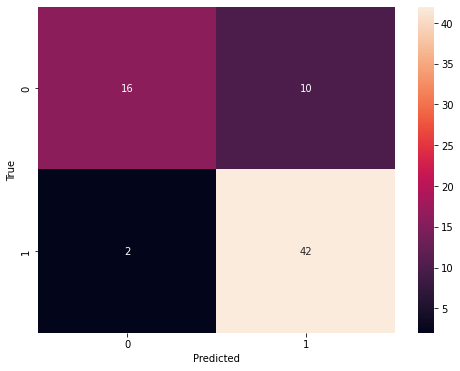

In [ ]:
cm2=tf.math.confusion_matrix(labels=y2_test,predictions=preds2)
plt.figure(figsize=(8,6))
sns.heatmap(cm2,annot=True,fmt='d')
plt.xlabel('Predicted')
plt.ylabel('True')

In [ ]:
perm = PermutationImportance(rf2, random_state=1).fit(X2_test, y2_test)
eli5.show_weights(perm, feature_names = X2_test.columns.tolist())

Weight,Feature
0.0886 ± 0.0333,AST
0.0286 ± 0.0256,CRP
0.0257 ± 0.0754,WBC
0.0229 ± 0.0229,Neutrophils
0.0200 ± 0.0291,ALT
0.0200 ± 0.0388,Lymphocytes
0.0171 ± 0.0114,GGT
0.0171 ± 0.0114,Platelets
0.0143 ± 0.0181,GENDER
0.0114 ± 0.0420,LDH


#**Training without Removing the ALT and GGT values but with Balanced dataset**

In [ ]:
X_sm2,y_sm2=smote.fit_resample(X2,y2)
y_sm2.value_counts()

1    177
0    177
Name: SWAB, dtype: int64

In [ ]:
X_train2,X_test2,y_train2,y_test2=train_test_split(X_sm2,y_sm2,stratify=y_sm2,test_size=0.2,random_state=2)
rff=RandomForestClassifier(n_estimators=250,random_state=0)
rff.fit(X_train2,y_train2)
preds3=rff.predict(X_test2)
print('Classification Report:\n',classification_report(y_test2,preds3))

Classification Report:
               precision    recall  f1-score   support

           0       0.91      0.83      0.87        36
           1       0.84      0.91      0.88        35

    accuracy                           0.87        71
   macro avg       0.88      0.87      0.87        71
weighted avg       0.88      0.87      0.87        71



Text(51.0, 0.5, 'True')

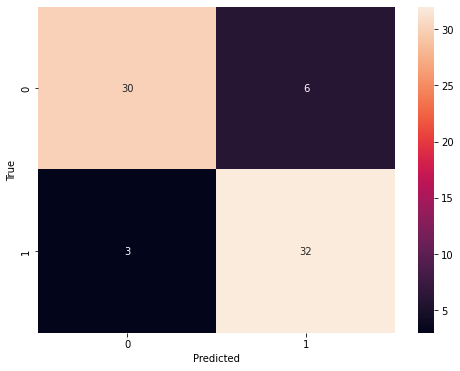

In [ ]:
cm3=tf.math.confusion_matrix(labels=y_test2,predictions=preds3)
plt.figure(figsize=(8,6))
sns.heatmap(cm3,annot=True,fmt='d')
plt.xlabel('Predicted')
plt.ylabel('True')

In [ ]:
perm = PermutationImportance(rff, random_state=1).fit(X_test2, y_test2)
eli5.show_weights(perm, feature_names = X_test2.columns.tolist())

Weight,Feature
0.1239 ± 0.0414,AST
0.0761 ± 0.0491,AGE
0.0648 ± 0.0382,CRP
0.0620 ± 0.0552,WBC
0.0507 ± 0.0138,Neutrophils
0.0423 ± 0.0471,LDH
0.0366 ± 0.0338,ALT
0.0282 ± 0.0178,Platelets
0.0254 ± 0.0113,ALP
0.0169 ± 0.0211,Lymphocytes
